# Graphics: Other Plots

This lesson covers:

* Histograms 
* Scatter Plots

Plotting in notebooks requires using a magic command, which starts with `%`, to initialize
the plotting backend.

In [1]:
# Setup
%matplotlib inline

Begin by loading the data in hf.h5. This data set contains high-frequency price data for IBM and MSFT
on a single day stored as two Series. IBM is stored as 'IBM' in the HDF file, and MSFT is stored
as 'MSFT.

In [2]:
import pandas as pd

ibm = pd.read_hdf('data/hf.h5', 'IBM')
msft = pd.read_hdf('data/hf.h5', 'MSFT')


## Problem: Histogram

Produce a histogram of MSFT 1-minute returns (Hint: you have to produce the 1-minute Microsoft
returns first using `resample` and `pct_change`).

Text(0.5, 1.0, '1-Minute MSFT returns (%)')

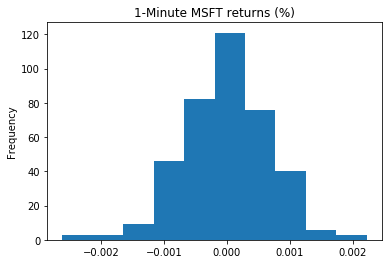

In [3]:
rets = msft.resample('60S').last().pct_change().dropna()
ax = rets.plot.hist()
ax.set_title('1-Minute MSFT returns (%)')

## Problem: Scatter Plot

Scatter the 5-minute MSFT returns against the 5-minute IBM returns.

*Hint*: You will need to create both 5-minute return series, merge them, and then plot using 
the combined DataFrame. 

                         MSFT       IBM
2011-05-06 09:35:00 -0.000287 -0.002446
2011-05-06 09:40:00  0.003063  0.000473
2011-05-06 09:45:00 -0.003359 -0.000709
2011-05-06 09:50:00  0.001455 -0.000827
2011-05-06 09:55:00 -0.001453 -0.000651
                         MSFT       IBM
2011-05-06 15:35:00 -0.000386  0.000534
2011-05-06 15:40:00  0.002513  0.001837
2011-05-06 15:45:00 -0.000193 -0.000296
2011-05-06 15:50:00 -0.001535 -0.001183
2011-05-06 15:55:00 -0.000780  0.000592


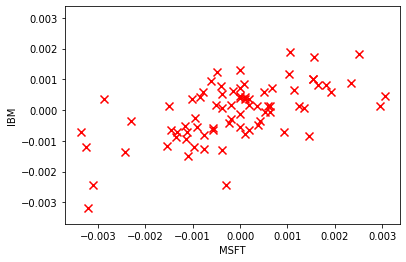

In [4]:
msft_rets = msft.resample('300S').last().pct_change().dropna()
ibm_rets = ibm.resample('300S').last().pct_change().dropna()
rets = pd.DataFrame([msft_rets, ibm_rets]).T
rets = rets.dropna()
print(rets.head())
print(rets.tail())

ax = rets.plot.scatter(x='MSFT', y='IBM', marker='x', s=64, c='red')
lower, upper = 1.1 * rets.min().min(), 1.1 * rets.max().max()
ax.set_xlim(lower, upper)
ylim = ax.set_ylim(lower, upper)

## Problem: Saving plots

Save the previous plot to PNG and PDF.

In [5]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.savefig('scatter.pdf')
# Save with custom DPI and transparent background
fig.savefig('scatter.png', transparent=True, dpi=300)

<Figure size 432x288 with 0 Axes>